In [2]:
# Preparation
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np

# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [3]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/Users/tyf981126/Desktop/FinalProject/5States/full_data_updated.csv'

# Use pandas to read the CSV file
data = pd.read_csv(file_path)

import pandas as pd

states_of_interest = ['Alaska', 'California', 'Connecticut', 'New Jersey', 'Texas']

filter_dta = data[data['State'].isin(states_of_interest)]

print(filter_dta)

                                                  Title  \
0     This Alaska Mine Would Destroy the World’s Lar...   
1     Cleaning Up a Legacy of Pollution on an Alaska...   
2     Searching for Signs of Lingering Pollution in ...   
3     Searching for Signs of Lingering Pollution in ...   
4     National Briefing | West: Alaska: Pollution Se...   
...                                                 ...   
1303                Weighing the Benefits Of Wind Power   
1304                Weighing the Benefits Of Wind Power   
1305  Not So Smart About Smart Growth; There Are Hid...   
1306  Congestion Pricing in Manhattan; Tired of Wait...   
1307  Too Many Planes, Too Much Noise; Not Enough Pr...   

                                                    URL  \
0     https://www.nytimes.com/2023/09/24/opinion/ala...   
1     https://www.nytimes.com/2015/08/04/us/native-a...   
2     https://www.nytimes.com/slideshow/2015/08/02/u...   
3     https://www.nytimes.com/slideshow/2015/08/02/u...

In [4]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

additional_stopwords = ['said','say','since']

stop_words = set(stopwords.words('english') + additional_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tyf981126/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def preprocess_text_for_phrases(text):
    # Replace known multi-word place names and other specific phrases with single tokens
    text = text.replace('New Jersey, Connecticut', 'New_Jersey_Connecticut')
    text = text.replace('New York, Connecticut', 'New_York_Connecticut')
    text = text.replace('clean up', 'clean_up')
    return text

def preprocess_text(text):
    # First handle specific phrases
    text = preprocess_text_for_phrases(text)
    # Then tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Filter out non-alphabetic tokens and stopwords
    return [token for token in tokens if token.isalpha() and token not in stop_words]

# Apply preprocessing to the DataFrame
filter_dta = filter_dta.copy()
filter_dta['processed_text'] = filter_dta['Abstrace'].apply(preprocess_text) 
filter_dta['tokens_join'] = filter_dta['processed_text'].apply(' '.join)


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer to generate bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# List of the specific states
states = ['Alaska', 'California', 'Connecticut', 'New Jersey', 'Texas']

# Dictionary to hold the bigram DataFrames for each state
bigram_dfs = {}

for state in states:
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert matrix to DataFrame with bi-gram columns for the current state
    bigram_dfs[state] = pd.DataFrame(state_text_bi.toarray(), columns=vectorizer.get_feature_names_out())


bigram_df_alaska = bigram_dfs['Alaska']

In [40]:

states = ['Alaska', 'California', 'Connecticut', 'New Jersey', 'Texas']

# Dictionary to hold the top bigrams for each state
top_bigrams_states = {}

for state in states:
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert sums to get the same length for further analysis
    bi_gram_sums = np.array(state_text_bi.sum(axis=0)).flatten()
    
    # Get the feature names (bi-grams)
    bi_gram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame from the bi-gram names and their sums
    bi_gram_freq_df = pd.DataFrame({'bi_gram': bi_gram_names, 'count': bi_gram_sums})
    
    # Sort the DataFrame by count in descending order
    bi_gram_freq_df_sorted = bi_gram_freq_df.sort_values(by='count', ascending=False)
    
    # Store the top 20 bi-grams for the current state
    top_bigrams_states[state] = bi_gram_freq_df_sorted.head(20)

top_bigrams_states['Alaska']

,bi_gram,count
818,exxon valdez,11
2363,wildlife refuge,10
1490,oil spill,10
1391,national wildlife,9
1477,oil gas,8
180,arctic national,8
1689,prince william,5
1473,oil drilling,5
1434,north slope,5
2272,valdez oil,5


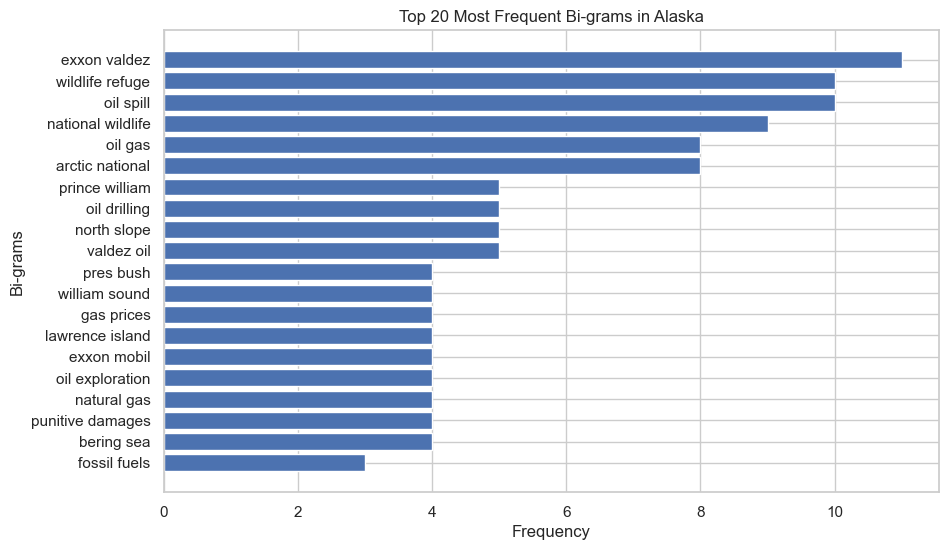

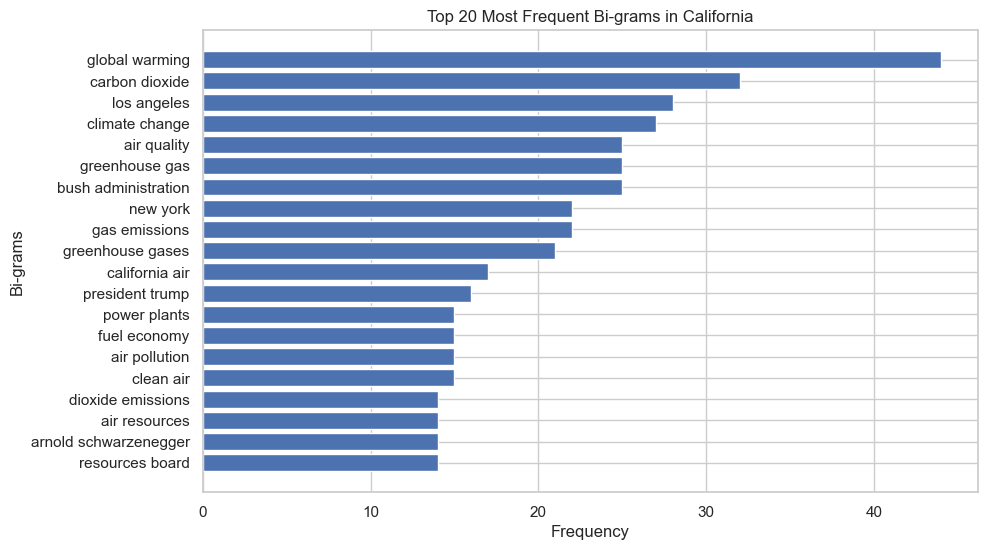

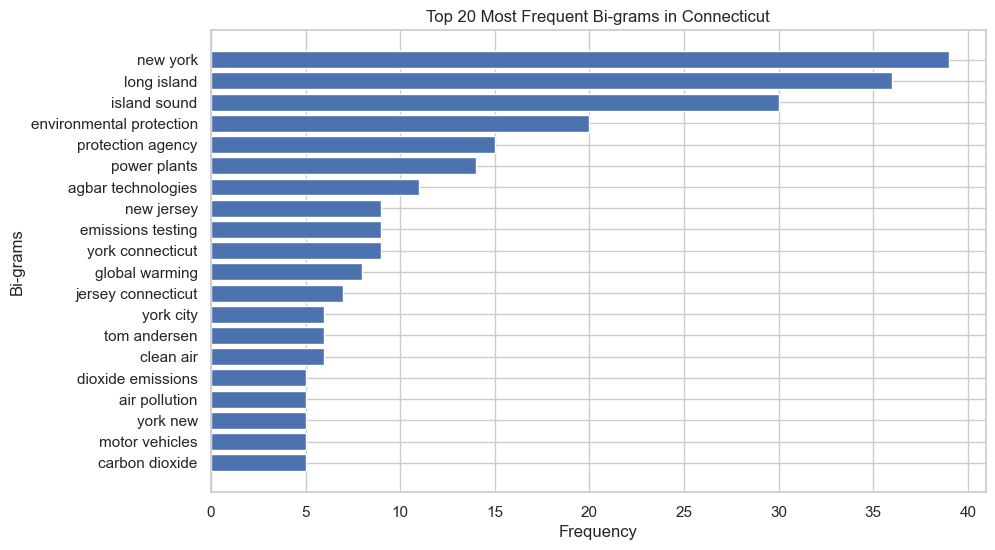

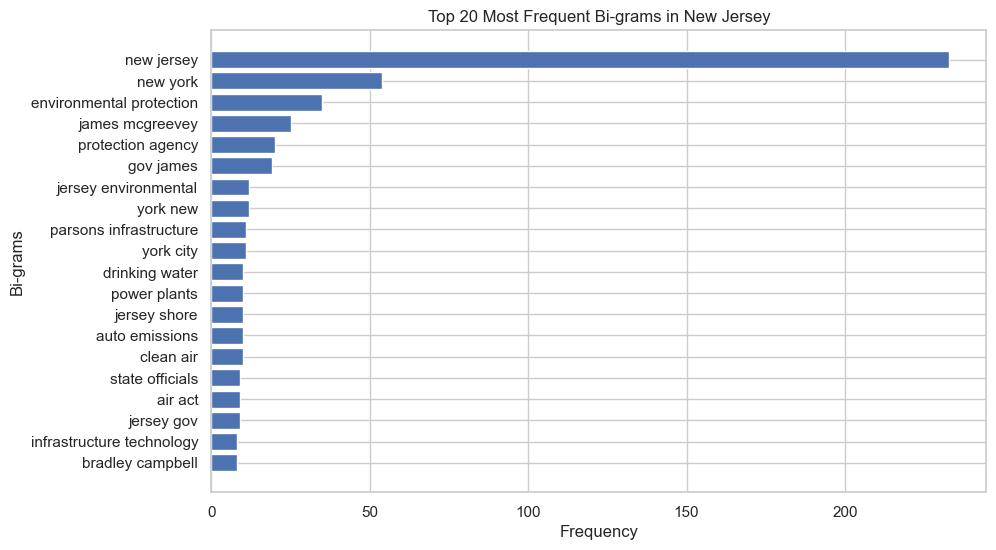

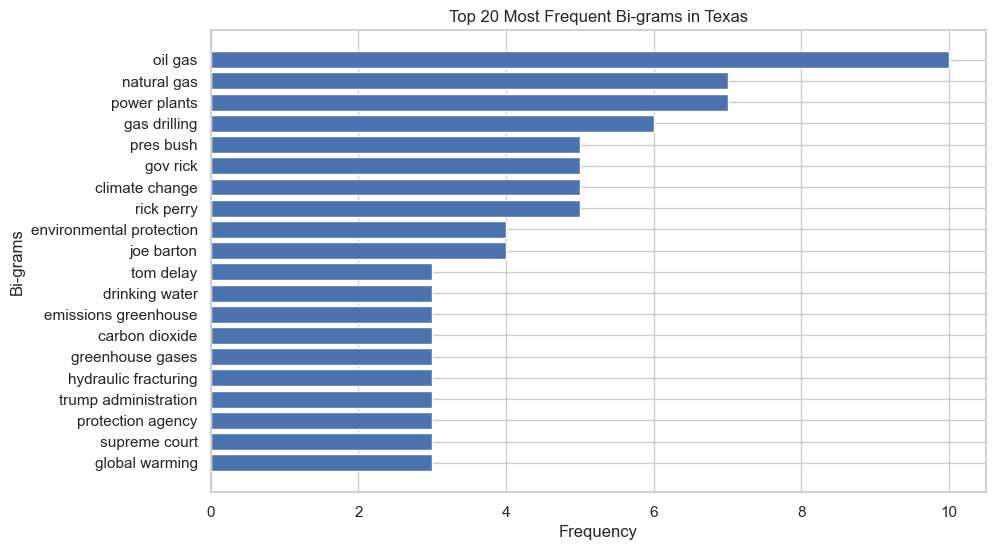

In [45]:
import matplotlib.pyplot as plt


for state, top_bi_grams_df in top_bigrams_states.items():
    bi_grams = top_bi_grams_df['bi_gram']
    counts = top_bi_grams_df['count']

    plt.figure(figsize=(10, 6))
    plt.barh(bi_grams, counts)
    plt.xlabel('Frequency')
    plt.ylabel('Bi-grams')
    plt.title(f'Top 20 Most Frequent Bi-grams in {state}')
    plt.gca().invert_yaxis()  # To display the highest frequency at the top

    plt.savefig(f'top_bigrams_{state}.png', format='png', bbox_inches='tight')

    plt.show()


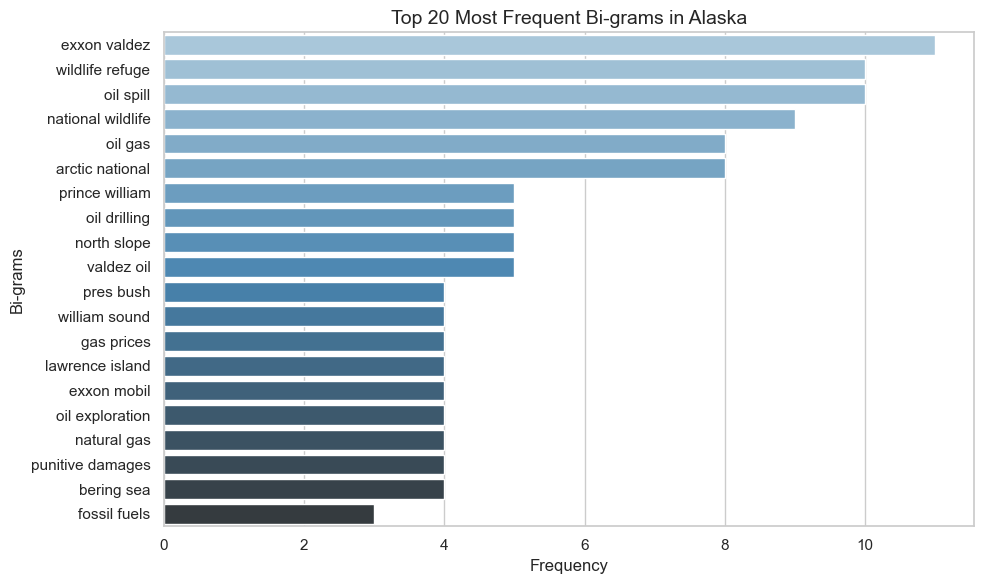

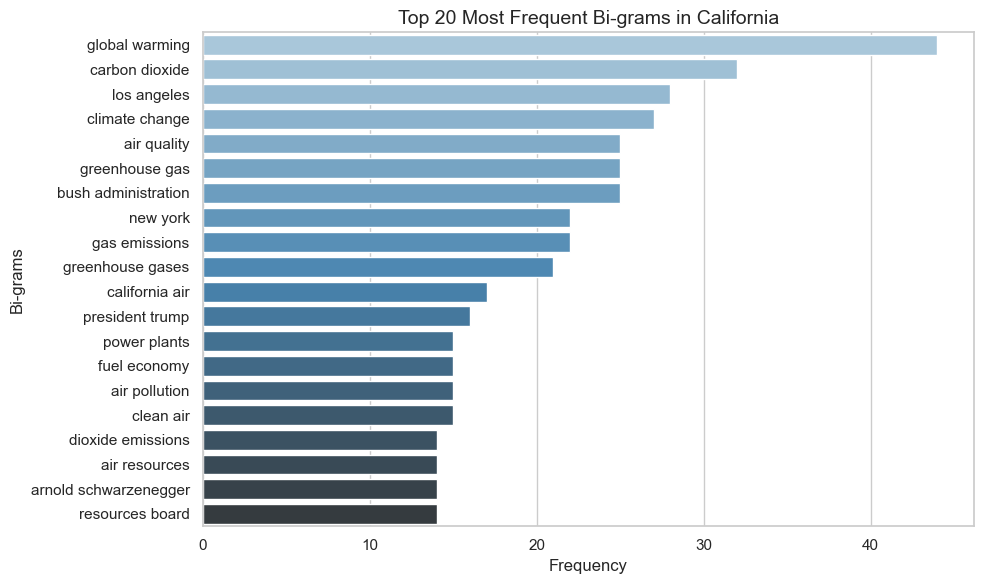

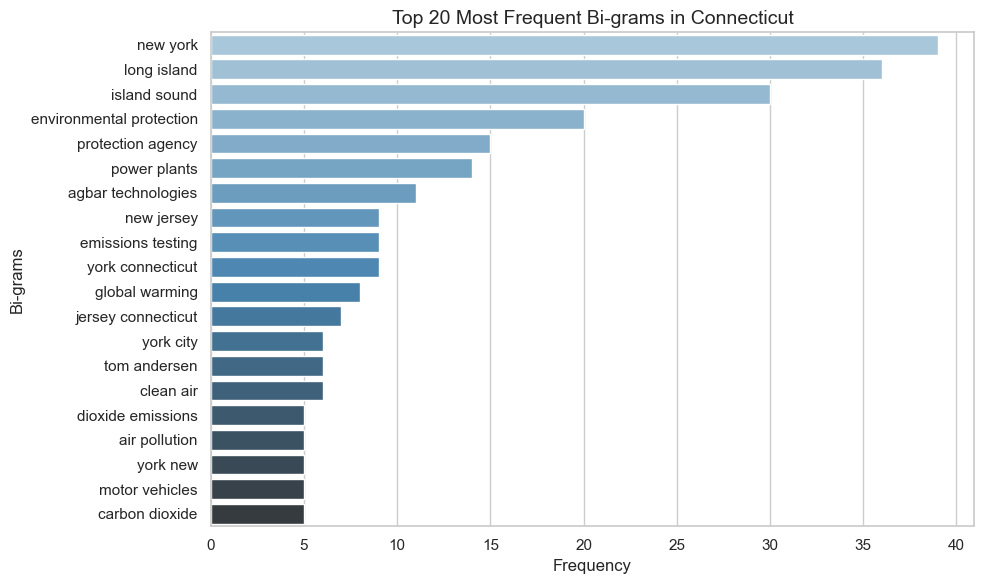

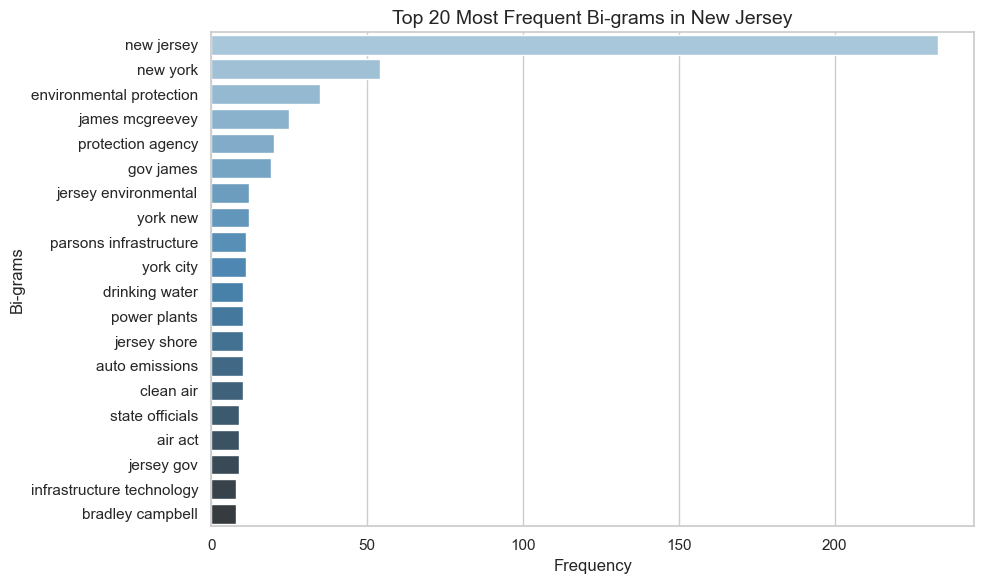

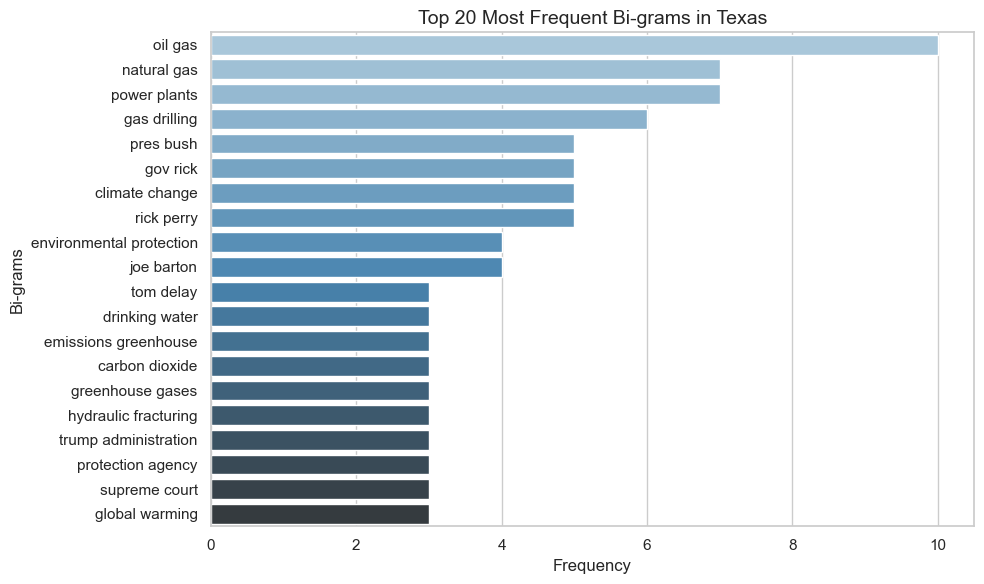

In [48]:
#Another version of plots for better visualization
import seaborn as sns

for state, top_bi_grams_df in top_bigrams_states.items():
    bi_grams = top_bi_grams_df['bi_gram']
    counts = top_bi_grams_df['count']

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid") 
    palette = sns.color_palette("mako", len(bi_grams))

    sns.barplot(x=counts, y=bi_grams, palette=palette)

    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Bi-grams', fontsize=12)
    plt.title(f'Top 20 Most Frequent Bi-grams in {state}', fontsize=14)

    plt.tight_layout()

    plt.show()


In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

additional_stopwords_ny = ['said','say','since','New York', 'New Jersey','new','york','jersey']

stop_words_ny = set(stopwords.words('english') + additional_stopwords_ny)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tyf981126/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def preprocess_text_for_phrases(text):
    text = text.replace('New Jersey, Connecticut', 'New_Jersey_Connecticut')
    text = text.replace('New York, Connecticut', 'New_York_Connecticut')
    text = text.replace('clean up', 'clean_up')
    return text

def preprocess_text(text):
    # First handle specific phrases
    text = preprocess_text_for_phrases(text)
    # Then tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Filter out non-alphabetic tokens and stopwords
    return [token for token in tokens if token.isalpha() and token not in stop_words_ny]

filter_dta = filter_dta.copy()
filter_dta['processed_text'] = filter_dta['Abstrace'].apply(preprocess_text)
filter_dta['tokens_join'] = filter_dta['processed_text'].apply(' '.join)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer to generate bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# List of the specific states
states = ['Alaska', 'California', 'Connecticut', 'New Jersey', 'Texas']

# Dictionary to hold the bigram DataFrames for each state
bigram_dfs = {}

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert matrix to DataFrame with bi-gram columns for the current state
    bigram_dfs[state] = pd.DataFrame(state_text_bi.toarray(), columns=vectorizer.get_feature_names_out())

# Now you can access the bigram DataFrame for each state like this:
bigram_df_nj = bigram_dfs['New Jersey']
bigram_df_nj

,abandoned strip,abused passaic,accelerate construction,accepting settlement,access controlled,access water,accident meanwhile,accident scenes,accident victims,accommodating cautious,...,yes would,yesterday environmental,yesterday would,yet finish,yet history,young children,zee bridge,zipf letter,zoning changes,zoning environmental
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:

states = ['Alaska', 'California', 'Connecticut', 'New Jersey', 'Texas']

# Dictionary to hold the top bigrams for each state
top_bigrams_states = {}

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert sums to get the same length for further analysis
    bi_gram_sums = np.array(state_text_bi.sum(axis=0)).flatten()
    
    # Get the feature names (bi-grams)
    bi_gram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame from the bi-gram names and their sums
    bi_gram_freq_df = pd.DataFrame({'bi_gram': bi_gram_names, 'count': bi_gram_sums})
    
    # Sort the DataFrame by count in descending order
    bi_gram_freq_df_sorted = bi_gram_freq_df.sort_values(by='count', ascending=False)
    
    # Store the top 20 bi-grams for the current state
    top_bigrams_states[state] = bi_gram_freq_df_sorted.head(20)

# Now 'top_bigrams_states' contains the top 20 bigrams for each of the five states.
top_bigrams_states['New Jersey']

,bi_gram,count
2257,environmental protection,35
3381,james mcgreevey,25
5145,protection agency,20
2799,gov james,19
4556,parsons infrastructure,11
1989,drinking water,10
1156,clean air,10
485,auto emissions,10
4943,power plants,10
6260,state officials,9


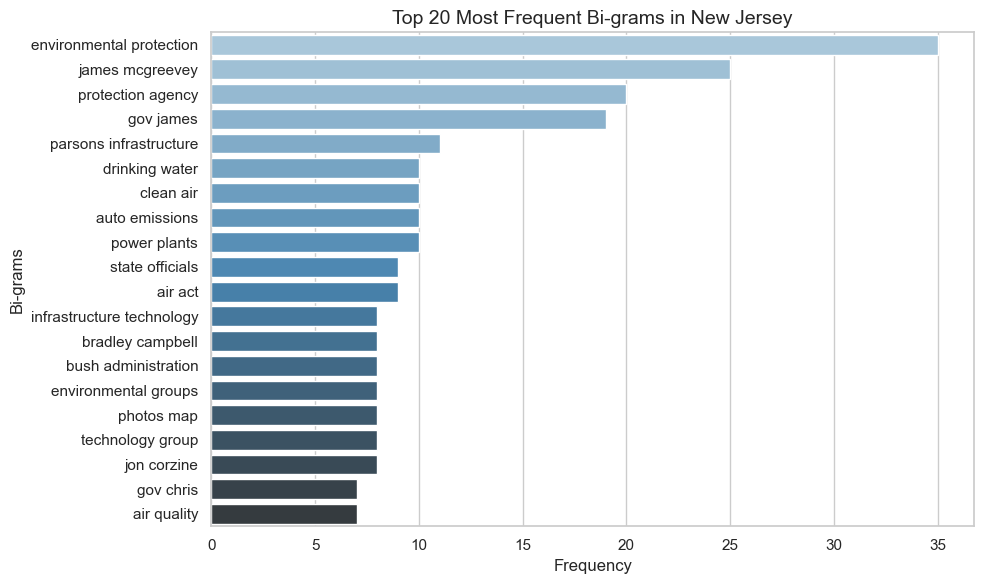

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve top bi-grams DataFrame for New Jersey
top_bi_grams_new_jersey = top_bigrams_states['New Jersey']
bi_grams = top_bi_grams_new_jersey['bi_gram']
counts = top_bi_grams_new_jersey['count']

# Create the plot for New Jersey
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("Blues_d", len(bi_grams))  # Using 'Blues' palette for a blue-themed look

sns.barplot(x=counts, y=bi_grams, palette=palette)

plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bi-grams', fontsize=12)
plt.title('Top 20 Most Frequent Bi-grams in New Jersey', fontsize=14)

plt.tight_layout()

plt.savefig('top_bigrams_New_Jersey_new.png', format='png', bbox_inches='tight')

plt.show()


In [14]:
# Count the number of New York and New Jersey in Connecticut dataset since we removed them
import pandas as pd

# Specify the path to your CSV file
file_path = '/Users/tyf981126/Desktop/FinalProject/5States/CT_data.csv'

# Use pandas to read the CSV file
ct_data = pd.read_csv(file_path)

In [15]:
import pandas as pd

# Assuming ct_data is your DataFrame and 'Abstrace' is the column name
# Note: If the column name is actually 'Abstract', modify the code accordingly.

# Convert the 'Abstrace' column to lower case for case-insensitive counting
ct_data['Abstrace_lower'] = ct_data['Abstrace'].str.lower()

# Count occurrences of 'new jersey' in each row of 'Abstrace_lower'
ct_data['new_jersey_count'] = ct_data['Abstrace_lower'].str.count('new jersey')

# Sum up all occurrences
total_new_jersey_count = ct_data['new_jersey_count'].sum()

print(f"Total number of occurrences of 'New Jersey' in 'Abstrace': {total_new_jersey_count}")


Total number of occurrences of 'New Jersey' in 'Abstrace': 10


In [16]:
# Count occurrences of 'new jersey' in each row of 'Abstrace_lower'
ct_data['new_york_count'] = ct_data['Abstrace_lower'].str.count('new york')

# Sum up all occurrences
total_new_york_count = ct_data['new_york_count'].sum()

print(f"Total number of occurrences of 'New York' in 'Abstrace': {total_new_york_count}")

Total number of occurrences of 'New York' in 'Abstrace': 40
